<div style="display: flex; text-align:center; background-color: rgb(153,102,153);" >
<h1 style="margin: auto; padding: 30px; ">Analysez les ventes d'une librairie avec Python <br>
</h1>
</div>

<div style="display: flex; text-align:center; background-color: rgb(153,102,153);" >
<h1 style="margin: auto; padding: 30px; ">Partie 2 - Exploration / Analyse <br>
</h1>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import scipy as scipy
import scipy.stats as st

In [2]:
rapport = pd.read_csv('rapport.csv')

In [3]:
rapport.head()

,id_prod,date,session_id,client_id,sex,birth,price,categ,transac_year,weekday,month,age,intervalle_age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,4.18,0,2022,Friday,5,36,"[30, 50)"
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986,4.18,0,2021,Tuesday,7,35,"[30, 50)"
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986,4.18,0,2022,Saturday,8,36,"[30, 50)"
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968,4.18,0,2021,Sunday,5,53,"[50, 70)"
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968,4.18,0,2022,Monday,5,54,"[50, 70)"


In [4]:
print(rapport.shape)
print(rapport.dtypes)

(679332, 13)
id_prod            object
date               object
session_id         object
client_id          object
sex                object
birth               int64
price             float64
categ               int64
transac_year        int64
weekday            object
month               int64
age                 int64
intervalle_age     object
dtype: object


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">1 - Fonctions</h2>
</div>

## Fonction statistique descriptive sur variable quanti améliorée (stats1) et simple (stats2)

In [5]:
# On aurait pu tout aussi bien utiliser describe() mais idéal pour s'entrainer sur les fcts
def stats1(df, col):
    print("+---------------------------------------------------------------------------------------------------------------------+")
    print("|                                  Analyse Univariée de la variable: ", str(col), "                                          |")
    print("+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+--------+--------+")
    print("|        |Observat|Mode    |Moyenne |Ecart-ty|  Min   |  Q1    | Median |  Q3    |  Max   |Variance |  Skw   |  Kur   |")
    print("+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+--------+--------+")
    print("|Global  |{:8,d}|{:8,.2f}|{:8,.2f}|{:8,.2f}|{:8,.2f}|{:8,.2f}|{:8,.2f}|{:8,.2f}|{:8,.2f}|{:8,.2f} |{:8,.2f}|{:8,.2f}|"      
    .format( rapport["price"].count(),
               round(df[str(col)].mode()[0],2),
               round(df[str(col)].mean(),2),
               round(df[str(col)].std(ddof=0),2),
               round(df[str(col)].min(),2),
               round(df[str(col)].quantile(.25),2),
               round(df[str(col)].quantile(.50),2),
               round(df[str(col)].quantile(.75),2),
               round(df[str(col)].max(),2),
               round(df[str(col)].var(ddof=0),2),
               round(df[str(col)].skew(),2), # coef d'applatissement
               round(df[str(col)].kurtosis(),2),
            ).replace(",", " "),
         ),
    print(),
    print('Méthode intercartile :'),    #rajout pour le sous-échantillon (les 3 categ)
    borne_inferieure = round((np.percentile(subset['price'],25)) - 1.5 * (np.percentile(subset['price'],75) - np.percentile(subset['price'],25)),2),
    borne_superieure = round((np.percentile(subset['price'],75)) + 1.5 * (np.percentile(subset['price'],75) - np.percentile(subset['price'],25)),2),
    print("Borne supérieure: ", str(borne_superieure)),
    print("Borne inférieure: ", str(borne_inferieure)),
    print(),
    print("Potentiels outliers avant borne inférieure: ",len(subset[subset['price'] < borne_inferieure])),
    print("Potentiels outliers après borne supérieure: ", len(subset[subset['price'] > borne_superieure])),
    print()    
        


In [6]:
def stats2(df, col):
    print("+---------------------------------------------------------------------------------------------------------------------+")
    print("|                                  Analyse Univariée de la variable: ", str(col), "                                          |")
    print("+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+--------+--------+")
    print("|        |Observat|Mode    |Moyenne |Ecart-ty|  Min   |  Q1    | Median |  Q3    |  Max   |Variance |  Skw   |  Kur   |")
    print("+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+--------+--------+")
    print("|Global  |{:8,d}|{:8,.2f}|{:8,.2f}|{:8,.2f}|{:8,.2f}|{:8,.2f}|{:8,.2f}|{:8,.2f}|{:8,.2f}|{:8,.2f} |{:8,.2f}|{:8,.2f}|"      
    .format( rapport["price"].count(),
               round(df[str(col)].mode()[0],2),
               round(df[str(col)].mean(),2),
               round(df[str(col)].std(ddof=0),2),
               round(df[str(col)].min(),2),
               round(df[str(col)].quantile(.25),2),
               round(df[str(col)].quantile(.50),2),
               round(df[str(col)].quantile(.75),2),
               round(df[str(col)].max(),2),
               round(df[str(col)].var(ddof=0),2),
               round(df[str(col)].skew(),2), # coef d'applatissement
               round(df[str(col)].kurtosis(),2),
            ).replace(",", " "),
         )

## Fonction pour la courbe de Lorenz et l'indice de Gini

In [68]:
def Lorenz_gini(df):
    new = rapport[["client_id","price"]].copy()
    new = new.groupby(['client_id']).sum()
    new.sort_values("client_id", axis = 0, inplace = True)
    print()
    print("Courbe Lorenz : ")
    price = new['price']
    n = len(price)
    lorenz = np.cumsum(np.sort(price)) / price.sum()
    lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
    plt.plot(np.linspace(0, 1, len(lorenz)), lorenz, label='CA par client')
    plt.plot([0,1], [0,1], color='orange', label='Bissectrice') #tracer la bisséctrice
    plt.vlines(0.75, 0, 0.5, ls='dotted', color='black')
    plt.hlines(0.5, 0, 0.75, ls='dotted', color='black', label='Médiale')
    plt.title("Répartition du CA entre client ",fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 18})
    plt.legend()
    
    AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
    S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
    gini = round(2*S,2)
    print("Gini : ", gini)

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">2 - Exploration </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">2.1- Stat descriptive </h3>
</div>

+---------------------------------------------------------------------------------------------------------------------+
|                                  Analyse Univariée de la variable:  price                                           |
+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+--------+--------+
|        |Observat|Mode    |Moyenne |Ecart-ty|  Min   |  Q1    | Median |  Q3    |  Max   |Variance |  Skw   |  Kur   |
+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+--------+--------+
|Global  | 679 332|   15.99|   17.45|   18.33|    0.62|    8.87|   13.99|   18.99|  300.00|  335.86 |    5.39|   43.08|


(-100.0, 300.0)

<Figure size 1080x720 with 0 Axes>

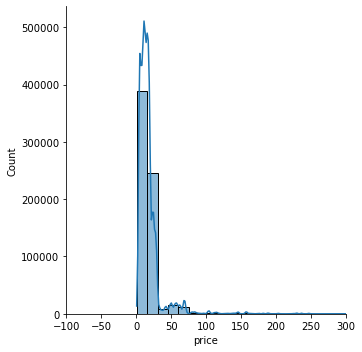

In [8]:
# Fonction stats2 sur variable Price :
stats2(rapport, 'price')
plt.figure(figsize=(15,10))
sns.displot(rapport["price"],bins=20, kde=True)
plt.xlim(-100,300,50)

Catégorie : 0


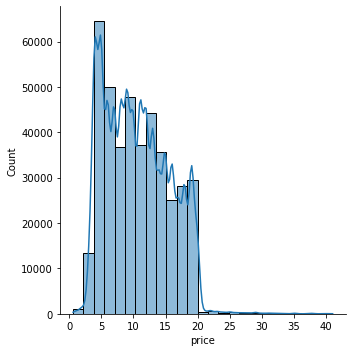

+---------------------------------------------------------------------------------------------------------------------+
|                                  Analyse Univariée de la variable:  price                                           |
+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+--------+--------+
|        |Observat|Mode    |Moyenne |Ecart-ty|  Min   |  Q1    | Median |  Q3    |  Max   |Variance |  Skw   |  Kur   |
+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+--------+--------+
|Global  | 679 332|    4.99|   10.64|    4.93|    0.62|    6.29|    9.99|   14.45|   40.99|   24.33 |    0.42|   -0.39|

Méthode intercartile :
Borne supérieure:  (26.69,)
Borne inférieure:  (-5.95,)

Potentiels outliers avant borne inférieure:  0
Potentiels outliers après borne supérieure:  839




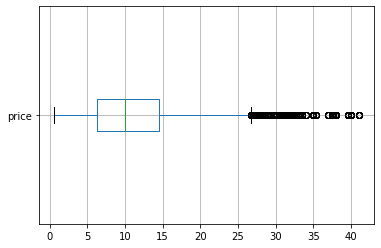

Catégorie : 1


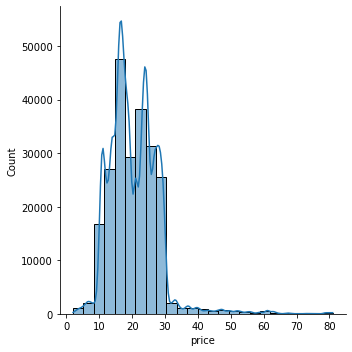

+---------------------------------------------------------------------------------------------------------------------+
|                                  Analyse Univariée de la variable:  price                                           |
+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+--------+--------+
|        |Observat|Mode    |Moyenne |Ecart-ty|  Min   |  Q1    | Median |  Q3    |  Max   |Variance |  Skw   |  Kur   |
+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+--------+--------+
|Global  | 679 332|   15.99|   20.49|    7.58|    2.00|   15.81|   19.08|   24.98|   80.99|   57.53 |    1.73|    8.16|

Méthode intercartile :
Borne supérieure:  (38.74,)
Borne inférieure:  (2.06,)

Potentiels outliers avant borne inférieure:  25
Potentiels outliers après borne supérieure:  4569




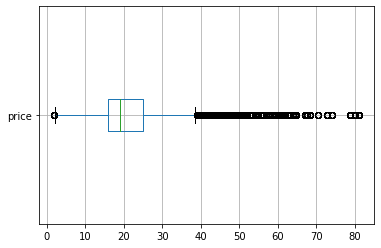

Catégorie : 2


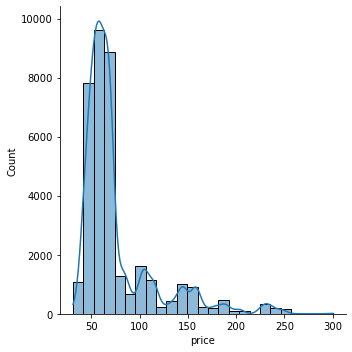

+---------------------------------------------------------------------------------------------------------------------+
|                                  Analyse Univariée de la variable:  price                                           |
+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+--------+--------+
|        |Observat|Mode    |Moyenne |Ecart-ty|  Min   |  Q1    | Median |  Q3    |  Max   |Variance |  Skw   |  Kur   |
+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+--------+--------+
|Global  | 679 332|   68.99|   76.21|   39.75|   30.99|   53.99|   62.83|   73.72|  300.00|1 579.94 |    2.18|    4.82|

Méthode intercartile :
Borne supérieure:  (103.32,)
Borne inférieure:  (24.4,)

Potentiels outliers avant borne inférieure:  0
Potentiels outliers après borne supérieure:  6504




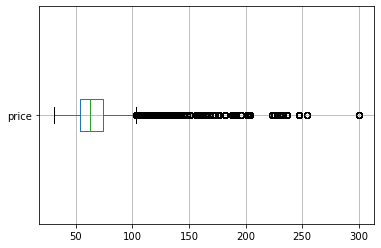

In [9]:
# Pour la variable price par catégorie
for categorie in rapport["categ"].unique():
    subset = rapport.loc[rapport.categ == categorie, :] # Création du sous-échantillon,
    print("Catégorie : "+ str(categorie)) 
    sns.displot(subset["price"], bins=25, kde=True) # Crée l'histogramme
    plt.show() # Affiche l'histogramme
    stats1(subset,'price')
    print()
    subset.boxplot(column="price", vert=False) # Crée le boxplot
    plt.show() # Affiche le boxplot

Categ 0 : skw de 0.42 (léger étal a dte) et kurto -39 (distri aplatie, observations moins concentrées)  mode < med < moy


categ 1 : 1.73 kws (étalé a dte) et kurt 8.16 (distri moins aplatie que distri normale, observ très concentrées) mode <  med < moy


categ 2 : skw 2.18 (grnd étalement a dte) et kurt 4.82 (distri pas du tt aplatie plutôt haute, obsr très concentré), mode > med <  med 

Concernant les potentiels outliers d'après les boxplots : on va vérifier visuellement ce que ça donne

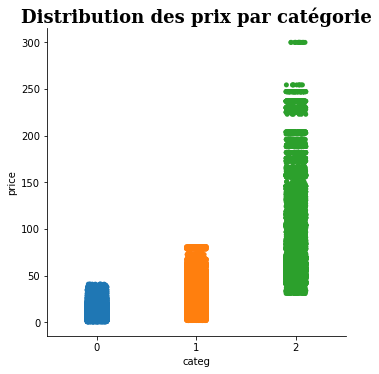

In [10]:
# graph distribution des prix par catégorie
sns.catplot(data=rapport, x='categ', y='price')
plt.title('Distribution des prix par catégorie',
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18});
plt.show()


Ce que l'on sait : sur les 3 catégories, les prix se "croisent" et atteignent un max au delà la catégorie précédente. La categ 0 est la moinc chère.(de 0.62c a 40.99€) Probablement des romans, des petites cartes postales ou autre à - d'1€, livres pour enfants.. e-book...Categ 1 de 2 à 80.99€ probalement des livres plus volumineux, ou des livres de cultures, romans, de cours (techniques, droit, médecine, informatique...) puis categ 2 de 31 à 300€. On est dans le meme cas que la categ 1, livres techniques, très volumineux, peut-être même rare ce qui expliquerait un prix aussi élevé etc. On peut même imaginer que c'est un magasin comme la fnac ? Et dans ce cas là, du matériel electronique ?

cependant : on va noter de potentiels outliers sur la categ 2. La moyenne des prix étant de 62.83€, l'écart-type est de 39.75 qui est très grand comparé aux autres catégories. 


D'après nos graphiques et notre méthode interquatile, nous allons constituer une liste des prix au delà de la borne supérieure que l'on fera vérifier par la suite.

In [11]:
# Liste potentiels outliers categ 2 à faire vérifier:
liste = rapport.loc[rapport["price"] > 103.32]
liste.groupby('id_prod')['price'].count()

id_prod
2_0      104
2_103      5
2_105     16
2_106     15
2_11      13
        ... 
2_89       4
2_90       6
2_94       8
2_97      13
2_98       1
Name: price, Length: 114, dtype: int64

In [12]:
#Analyse id_prod selon les catégories de produits 

for categorie in rapport["categ"].unique():
    subset = rapport.loc[rapport.categ == categorie, :] # Création du sous-échantillon
    print()
    print("-"*20)
    print("Catégorie : "+ str(categorie))
    print()
    print("Les modalités :")
    print("Nombre vente:\n",(subset['id_prod'].count()))   
    print("Nombre pdt unique:\n",(len(subset['id_prod'].unique())))
    print("Mode:\n",(subset['id_prod'].mode()[0]))


--------------------
Catégorie : 0

Les modalités :
Nombre vente:
 415680
Nombre pdt unique:
 2293
Mode:
 0_1422

--------------------
Catégorie : 1

Les modalités :
Nombre vente:
 227169
Nombre pdt unique:
 737
Mode:
 1_369

--------------------
Catégorie : 2

Les modalités :
Nombre vente:
 36483
Nombre pdt unique:
 236
Mode:
 2_102


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">2.2- Chiffres importants </h3>
</div>

## Chiffres clés (sur toute la période donnée)

In [13]:
#Nombre de produits disponibles et vendus
pdt_total = rapport['id_prod'].nunique() + 21
print("Le nb de pdts disponibles en ligne est de :", str(pdt_total))
pdt_unique_vendu = rapport['id_prod'].nunique()
print("Le nb de pdts uniques vendus est de :", str(pdt_unique_vendu))

print()
#CA total:
CA_global = rapport['price'].sum()
print("Le CA global de la période donnée est de : ", str(round(CA_global,2)) , "euros")

#Ventes totales:
ventes_totales = rapport['session_id'].count() 
print('Le nombre de ventes totales est de : ' + str(ventes_totales))

print()

clients_unique = rapport['client_id'].nunique() + 23 #Nb clients qui n'ont pas acheté
print("Nb clients uniques :", str(clients_unique))
client_achat = rapport['client_id'].nunique()
print("Nb clients qui ont acheté :", str(client_achat))
clients_pls_achats = (rapport.groupby('client_id')['session_id'].count()>1).sum()
print("Nb clients avec plus d'un achat :", str(clients_pls_achats))
#Trafic : on sait qu'une ligne session = 1 transaction, mais on peut faire plusieurs transactions le mm jour avec la mm session
# =  nombre de visites ou de visiteurs sur une période donnée
trafic = rapport['session_id'].nunique()
print("Le trafic sur le site pour la période globale donnée est de :", trafic)

print()

#CA par catégorie
print("CA par catégorie")
print(rapport.groupby('categ')['price'].sum())
print()
print("CA moyen : ", round(rapport.groupby('categ')['price'].mean(),2))
print()
print('Ventes par catégorie')
print(rapport.groupby('categ')['session_id'].count())

Le nb de pdts disponibles en ligne est de : 3287
Le nb de pdts uniques vendus est de : 3266

Le CA global de la période donnée est de :  11856080.12 euros
Le nombre de ventes totales est de : 679332

Nb clients uniques : 8623
Nb clients qui ont acheté : 8600
Nb clients avec plus d'un achat : 8592
Le trafic sur le site pour la période globale donnée est de : 342315

CA par catégorie
categ
0    4422082.41
1    4653722.69
2    2780275.02
Name: price, dtype: float64

CA moyen :  categ
0    10.64
1    20.49
2    76.21
Name: price, dtype: float64

Ventes par catégorie
categ
0    415680
1    227169
2     36483
Name: session_id, dtype: int64


In [14]:
#Par an :

# Panier moyen= 
print("Panier moyen par année:")
panier_moyen = rapport.groupby('transac_year')['price'].mean()
print(round(panier_moyen,2))

print()

# freq= nombre d'achats réalisé par un client sur une période donnée
freq = rapport.groupby('transac_year')['session_id'].count()
print("Fréquence d'achat par an ")
print(freq)

print()

#CA par an :
print('CA par année :')
ca_an = rapport.groupby('transac_year')['price'].sum()
print(round(ca_an,2))

print()

#CA par categ par an : 
print('CA par année et par catégorie :')
ca_an_cat = rapport.groupby(['transac_year', 'categ'])['price'].sum()
print(round(ca_an_cat,2))

Panier moyen par année:
transac_year
2021    17.14
2022    17.63
2023    17.88
Name: price, dtype: float64

Fréquence d'achat par an 
transac_year
2021    278335
2022    346500
2023     54497
Name: session_id, dtype: int64

CA par année :
transac_year
2021    4771752.24
2022    6109958.61
2023     974369.27
Name: price, dtype: float64

CA par année et par catégorie :
transac_year  categ
2021          0        1883946.13
              1        1777995.85
              2        1109810.26
2022          0        2194247.26
              1        2485275.19
              2        1430436.16
2023          0         343889.02
              1         390451.65
              2         240028.60
Name: price, dtype: float64


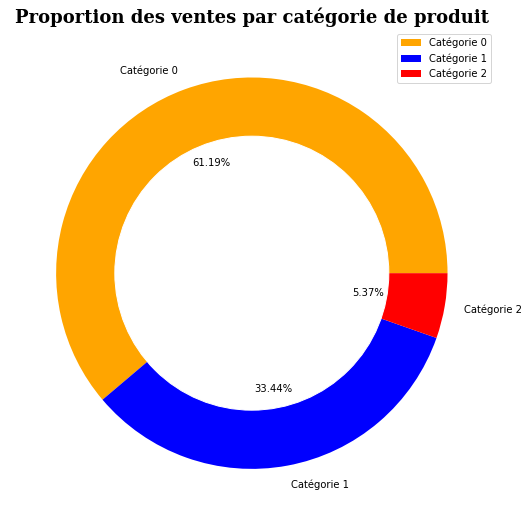

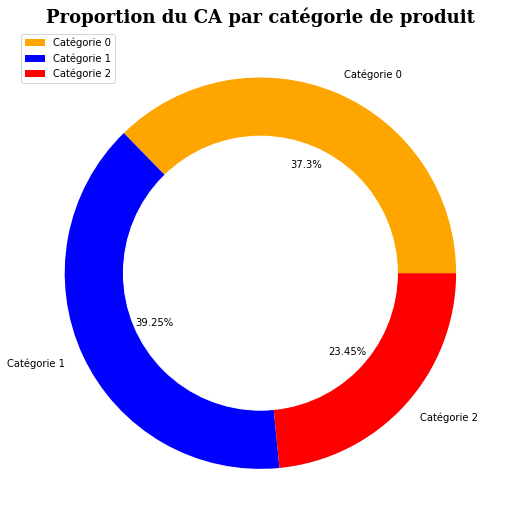

In [15]:
#Proportion des ventes par catégorie
graph_ventes_par_categ = [415680, 227169, 36483]
plt.figure(figsize=(9,9))
plt.pie(graph_ventes_par_categ, labels=["Catégorie 0","Catégorie 1", "Catégorie 2"],colors=["orange", "blue", "red"], 
         normalize = True,
       autopct =lambda x: str(round(x, 2)) + '%' )
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Proportion des ventes par catégorie de produit",
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
plt.legend()


#Proportion du CA par catégorie
graph_CA_par_categ = [4422082.41, 4653722.69, 2780275.02]
plt.figure(figsize=(9,9))
plt.pie(graph_CA_par_categ, labels=["Catégorie 0","Catégorie 1", "Catégorie 2"],colors=["orange", "blue", "red"], 
         normalize = True,
       autopct =lambda x: str(round(x, 2)) + '%' )
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Proportion du CA par catégorie de produit",
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
plt.legend()


Les gens achètent bcp plus de pdts de la categ 0 (prix plus abordables?) et bcp - dans la categ 1. Le CA généré est similaire entre la categ 0 et 1 37-39% et relativement bon par rapport à vente de la categ 2 (23.45% car prix bien plus supérieur).

## Plus précisément par produits

In [16]:
# CA par produits :
print("CA par produits :")
CA_pdts = rapport.groupby('id_prod')['price'].sum()
print(CA_pdts.sort_values(ascending=False))

print()

# Vente par produits :
print("Vente par produits :")
vente_pdts = rapport.groupby('id_prod')['session_id'].count()
print(vente_pdts.sort_values(ascending=False))

CA par produits :
id_prod
2_159     94893.50
2_135     69334.95
2_112     65407.76
2_102     60736.78
2_209     56971.86
            ...   
0_1601        1.99
0_807         1.99
0_1653        1.98
0_1284        1.38
0_1539        0.99
Name: price, Length: 3266, dtype: float64

Vente par produits :
id_prod
1_369     2252
1_417     2189
1_414     2180
1_498     2128
1_425     2096
          ... 
0_1284       1
0_549        1
0_1498       1
0_541        1
0_886        1
Name: session_id, Length: 3266, dtype: int64


# VOIR PARTIE 3 POUR ANALYSE CA DANS LE TEMPS

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">2.3- Top et flop des produits </h3>
</div>

In [17]:
#TOP/FLOP du CA

for categorie in rapport["categ"].unique():
    subset = rapport.loc[rapport.categ == categorie, :] # Création du sous-échantillon
    print("-"*20)
    print("Catégorie : "+ str(categorie))
    print()
    print("Top CA:\n" , subset.groupby('id_prod')['price'].sum().sort_values(ascending=False).head(5))
    print()
    print("Flop CA :\n", subset.groupby('id_prod')['price'].sum().sort_values(ascending=True).head(5))
    print()
    print("Prix pdt les plus chers :\n", subset.groupby('id_prod')['price'].unique().sort_values(ascending=False).head(5))

--------------------
Catégorie : 0

Top CA:
 id_prod
0_1441    23452.65
0_1421    23008.49
0_1414    22287.00
0_1451    21689.15
0_1417    21372.12
Name: price, dtype: float64

Flop CA :
 id_prod
0_1539    0.99
0_1284    1.38
0_1653    1.98
0_1601    1.99
0_541     1.99
Name: price, dtype: float64

Prix pdt les plus chers :
 id_prod
0_1629    [40.99]
0_2147    [39.99]
0_494     [39.58]
0_1581    [37.99]
0_1239    [37.99]
Name: price, dtype: object
--------------------
Catégorie : 1

Top CA:
 id_prod
1_395    54356.25
1_369    54025.48
1_414    51949.40
1_383    51486.24
1_498    49731.36
Name: price, dtype: float64

Flop CA :
 id_prod
1_420    14.24
1_224    19.80
1_470    21.64
1_473    26.91
1_404    29.55
Name: price, dtype: float64

Prix pdt les plus chers :
 id_prod
1_13     [80.99]
1_679    [79.99]
1_10     [78.83]
1_171    [73.99]
1_608    [72.75]
Name: price, dtype: object
--------------------
Catégorie : 2

Top CA:
 id_prod
2_159    94893.50
2_135    69334.95
2_112    65407.76

On voit que les pdts qui ont les prix les plus élévés ne correspondent pas aux top CA 

In [18]:
#TOP/FLOP des ventes
for categorie in rapport["categ"].unique():
    subset = rapport.loc[rapport.categ == categorie, :] # Création du sous-échantillon
    print("-"*20)
    print("Catégorie : "+ str(categorie))
    print()
    print("Top ventes:\n" , subset.groupby('id_prod')['session_id'].count().sort_values(ascending=False).head(5))
    print()
    print("Flop ventes:\n", subset.groupby('id_prod')['session_id'].count().sort_values(ascending=True).head(5))

--------------------
Catégorie : 0

Top ventes:
 id_prod
0_1422    1292
0_1431    1282
0_1425    1266
0_1432    1254
0_1411    1246
Name: session_id, dtype: int64

Flop ventes:
 id_prod
0_2201    1
0_1633    1
0_549     1
0_1601    1
0_1539    1
Name: session_id, dtype: int64
--------------------
Catégorie : 1

Top ventes:
 id_prod
1_369    2252
1_417    2189
1_414    2180
1_498    2128
1_425    2096
Name: session_id, dtype: int64

Flop ventes:
 id_prod
1_514    2
1_420    2
1_402    2
1_146    3
1_404    3
Name: session_id, dtype: int64
--------------------
Catégorie : 2

Top ventes:
 id_prod
2_102    1027
2_135    1005
2_112     968
2_39      915
2_37      882
Name: session_id, dtype: int64

Flop ventes:
 id_prod
2_98    1
2_23    1
2_81    1
2_93    2
2_77    2
Name: session_id, dtype: int64


In [19]:
# Meilleurs clients :
best_cli = rapport.groupby('client_id', )[['price', 'id_prod']].sum().sort_values(by='price',ascending=False).head(10)
print('Les 10 meilleurs clients niveau CA :')
print(best_cli)

print()

bad_cli = rapport.groupby('client_id', )[['price', 'id_prod']].sum().sort_values(by='price',ascending=True).head(10)
print('Les 10 plus mauvais clients niveau CA :')
print(bad_cli)

Les 10 meilleurs clients niveau CA :
               price
client_id           
c_1609     324033.35
c_4958     289760.34
c_6714     153662.76
c_3454     113669.85
c_3263       5276.87
c_1570       5271.62
c_2899       5214.05
c_2140       5208.82
c_7319       5155.77
c_8026       5093.22

Les 10 plus mauvais clients niveau CA :
           price
client_id       
c_8351      6.31
c_8140      8.30
c_8114      9.98
c_240      11.06
c_4648     11.20
c_4478     13.36
c_5962     13.99
c_6040     15.72
c_5919     15.98
c_5829     16.07


In [20]:
# Meilleurs clients :
best_cli_vente = rapport.groupby('client_id', )['session_id'].count().sort_values(ascending=False).head(10)
print('Les 10 clients qui ont achetés le plus :')
print(best_cli_vente)

Les 10 clients qui ont achetés le plus :
client_id
c_1609    25488
c_6714     9187
c_3454     6773
c_4958     5195
c_3263      403
c_2140      402
c_2595      398
c_2077      384
c_1637      380
c_7421      379
Name: session_id, dtype: int64


On voit que ce sont les mêmes que les 5 meilleurs clients. On peut se poser des questions... 324K Euros d'achat, 25k livres ??!!! 

In [21]:
# On va regarder les 4 premiers des meilleurs clients niveau CA

client1= rapport.loc[rapport['client_id'] == 'c_1609']
print("Client 1 :")
print(client1.groupby('client_id')['id_prod'].value_counts())

print()

client2= rapport.loc[rapport['client_id'] == 'c_4958']
print("Client 2 :")
print(client2.groupby('client_id')['id_prod'].value_counts())

print()

client3= rapport.loc[rapport['client_id'] == 'c_6714']
print("Client 3 :")
print(client3.groupby('client_id')['id_prod'].value_counts())

print()

client4= rapport.loc[rapport['client_id'] == 'c_3454']
print("Client 4 :")
print(client4.groupby('client_id')['id_prod'].value_counts())


Client 1 :
client_id  id_prod
c_1609     0_1438     95
           0_1360     79
           0_1334     78
           0_1424     75
           0_1411     73
                      ..
           1_708       1
           1_73        1
           1_90        1
           1_94        1
           2_46        1
Name: id_prod, Length: 1920, dtype: int64

Client 2 :
client_id  id_prod
c_4958     2_39       94
           2_37       93
           2_110      89
           2_109      85
           2_209      84
                      ..
           2_49        1
           2_64        1
           2_66        1
           2_88        1
           2_94        1
Name: id_prod, Length: 467, dtype: int64

Client 3 :
client_id  id_prod
c_6714     1_498      48
           1_403      42
           1_383      39
           1_400      38
           1_389      37
                      ..
           2_215       1
           2_217       1
           2_223       1
           2_26        1
           2_57        1


On voit que ce sont des grosses commandes. Une personne lambda, même si elle aime beaucoup lire n'acheterait pas 324k€ et encore moins 95 fois le même produit. Quelqu'un qui les revend à son tour, oui pourquoi pas. On peut penser que ces 4 clients sont en fait des professionnels (autres librairies, grandes surfaces, bureaux de tabac,... )

In [22]:
client_professionnel = rapport.loc[rapport['client_id'] == 'c_1609']
a = rapport.loc[rapport['client_id'] == 'c_4958']
b = rapport.loc[rapport['client_id'] == 'c_6714']
c = rapport.loc[rapport['client_id'] == 'c_3454']

client_professionnel = client_professionnel.append([a, b, c])
print(client_professionnel.shape)

(46643, 13)


In [23]:
#On va donc les mettre à part pour ne pas influencer notre analyse : 
rapport.drop(rapport[rapport['client_id'] == 'c_1609'].index, inplace=True)
rapport.drop(rapport[rapport['client_id'] == 'c_4958'].index, inplace=True)
rapport.drop(rapport[rapport['client_id'] == 'c_6714'].index, inplace=True)
rapport.drop(rapport[rapport['client_id'] == 'c_3454'].index, inplace=True)
rapport.shape

(632689, 13)

In [24]:
#On en profite pour regarder d'un peu plus prés les clients_pro : 
ca_tot_cli_pro = round(client_professionnel['price'].sum(),2)
print("Le CA total des clients pro :")
print(ca_tot_cli_pro)

print()

nb_achat = client_professionnel['id_prod'].count()
print("Nombre d'achat total :", nb_achat)

print()

pan_moy = round(client_professionnel['price'].mean(),2)
print("Le panier moyen des cli pro : ", str(pan_moy))

print()

print("Nb achat par categ :")
d = pd.crosstab(index=client_professionnel['client_id'], columns=client_professionnel['categ'])
print(d)

print()

print("Panier moyen par categ :")
c = pd.crosstab(index=client_professionnel['client_id'], columns=client_professionnel['categ'], values=client_professionnel['price'], aggfunc='mean')
print(round(c,2))

print()

print("Nb de CA par categ :")
e =pd.crosstab(index=client_professionnel['client_id'], columns=client_professionnel['categ'], values=client_professionnel['price'], aggfunc='sum')
print(round(e,2))

Le CA total des clients pro :
881126.3

Nombre d'achat total : 46643

Le panier moyen des cli pro :  18.89

Nb achat par categ :
categ          0     1     2
client_id                   
c_1609     20167  5310    11
c_3454      2700  4055    18
c_4958         4  1888  3303
c_6714      5316  3568   303

Panier moyen par categ :
categ          0      1       2
client_id                      
c_1609     10.63  20.35  136.47
c_3454     10.67  20.61   70.85
c_4958     12.19  20.86   75.79
c_6714     10.78  20.53   76.23

Nb de CA par categ :
categ              0          1          2
client_id                                 
c_1609     214447.24  108084.90    1501.21
c_3454      28811.61   83583.02    1275.22
c_4958         48.76   39375.24  250336.34
c_6714      57318.43   73246.54   23097.79


In [25]:
# On va refaire un top 5 des best cli :
best_cli = rapport.groupby('client_id', )[['price', 'id_prod']].sum().sort_values(by='price',ascending=False).head()
print('Les 5 meilleurs clients niveau CA :')
print(best_cli)

Les 5 meilleurs clients niveau CA :
             price
client_id         
c_3263     5276.87
c_1570     5271.62
c_2899     5214.05
c_2140     5208.82
c_7319     5155.77


On est bien sur des 5k, ça semble cohérent. 

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">3.4- Profil client </h3>
</div>

+---------------------------------------------------------------------------------------------------------------------+
|                                  Analyse Univariée de la variable:  age                                           |
+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+--------+--------+
|        |Observat|Mode    |Moyenne |Ecart-ty|  Min   |  Q1    | Median |  Q3    |  Max   |Variance |  Skw   |  Kur   |
+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+--------+--------+
|Global  | 632 689|   43.00|   43.89|   13.84|   18.00|   35.00|   42.00|   51.00|   94.00|  191.67 |    0.60|    0.33|


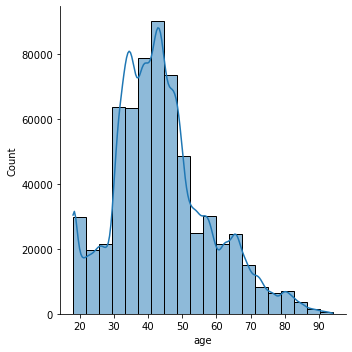

In [26]:
# Distribution de la variable age 
stats2(rapport, 'age')
#print(rapport['age'].hist())
sns.displot(rapport['age'], bins=20, kde=True)

la moy et la médianne sont proche. Au niveau des mesures de forme, skewness (mesure asymétrie) est de 0.60 (>0) on a donc un très léger étalement vers la droite
pour le kurtosis (mesure d'applatissement) 0.33 > 0 donc notre distri est moins aplatie que la distri normale, nos observations sont plus concentrées.

In [27]:
# Concernant la fréquence d'achat par âge
age_freqAchat = rapport.groupby(['age'])['price'].count().reset_index()
age_freqAchat.columns = ['age', 'Nb_achat']


total = age_freqAchat.Nb_achat.sum()


age_freqAchat['freq_achat'] = (age_freqAchat['Nb_achat'] * 100 )/ total
print(age_freqAchat)
print("total : ", total)

    age  Nb_achat  freq_achat
0    18     15571    2.461083
1    19      5409    0.854922
2    20      4432    0.700502
3    21      4306    0.680587
4    22      4715    0.745232
..  ...       ...         ...
72   90       243    0.038407
73   91       210    0.033192
74   92       196    0.030979
75   93       129    0.020389
76   94        23    0.003635

[77 rows x 3 columns]
total :  632689


In [28]:
# Nombre de personne par tranche d'âge :
rapport.groupby('intervalle_age')['client_id'].count()

intervalle_age
[18, 30)     70909
[30, 50)    386799
[50, 70)    141761
[70, 95)     33220
Name: client_id, dtype: int64

In [29]:
#Nombre d'achat par tranche d'âge

freqAchat_tranche = rapport.groupby('intervalle_age')['price'].count().reset_index()
freqAchat_tranche.columns = ['intervalle_age', 'Nb_achat']
freqAchat_tranche

total = freqAchat_tranche.Nb_achat.sum()

freqAchat_tranche['freq_achat'] = (freqAchat_tranche['Nb_achat'] * 100 )/ total
print(freqAchat_tranche)
print("total : ", total)

  intervalle_age  Nb_achat  freq_achat
0       [18, 30)     70909   11.207560
1       [30, 50)    386799   61.135724
2       [50, 70)    141761   22.406111
3       [70, 95)     33220    5.250605
total :  632689


Text(2.75, 45000, '33220')

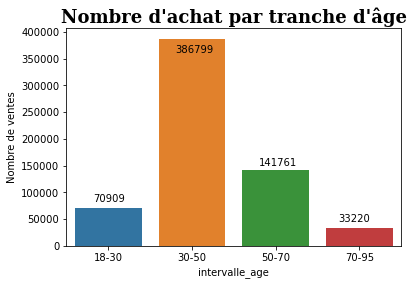

In [30]:
sns.barplot(data=freqAchat_tranche, x=freqAchat_tranche.intervalle_age, y=freqAchat_tranche.Nb_achat)
plt.title("Nombre d'achat par tranche d'âge",
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
plt.ylabel("Nombre de ventes")
plt.xticks([0, 1,2,3 ], ["18-30", "30-50", "50-70", "70-95"])
plt.text(-0.18,82000, '70909')
plt.text(0.8,360000, '386799')
plt.text(1.8,150000, '141761')
plt.text(2.75,45000, '33220')

In [31]:
# CA par tranche d'âge
ca_age = rapport.groupby('intervalle_age')['price'].sum().reset_index()
ca_age.columns = ['intervalle_age', 'ca']
total = ca_age.ca.sum()
ca_age['ca_pct'] = round((ca_age['ca'] * 100 )/ total,2)
print("Nombre de CA par tranche d'âge :")
print(ca_age)
print("total : ", total)

print()

#Panier moyen par tr d'âge :
pan_age = rapport.groupby('intervalle_age')['price'].mean()
print("Panier moyen par tranche d'âge :")
print(round(pan_age,2))

print()

pan_age_categ = pd.crosstab(index=rapport['intervalle_age'], columns=rapport['categ'], values=rapport['price'], aggfunc='mean')
print("Panier moyen par tranche d'âge et categ :")
print(round(pan_age_categ,2))

Nombre de CA par tranche d'âge :
  intervalle_age          ca  ca_pct
0       [18, 30)  2855786.86   26.02
1       [30, 50)  5220032.00   47.56
2       [50, 70)  2344479.50   21.36
3       [70, 95)   554655.46    5.05
total :  10974953.82

Panier moyen par tranche d'âge :
intervalle_age
[18, 30)    40.27
[30, 50)    13.50
[50, 70)    16.54
[70, 95)    16.70
Name: price, dtype: float64

Panier moyen par tranche d'âge et categ :
categ               0      1      2
intervalle_age                     
[18, 30)        10.65  20.50  75.47
[30, 50)        10.63  20.46  81.41
[50, 70)        10.66  20.50  82.38
[70, 95)        10.68  20.47  72.00


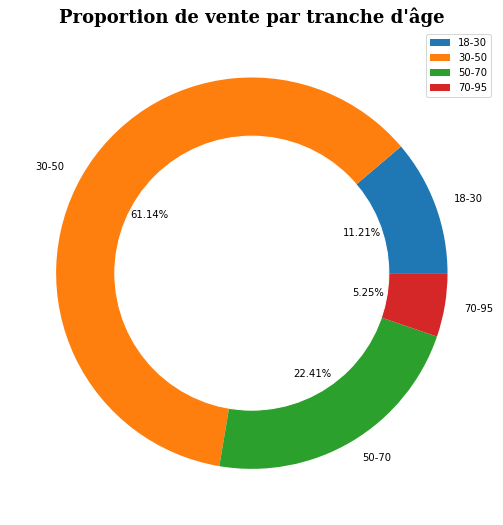

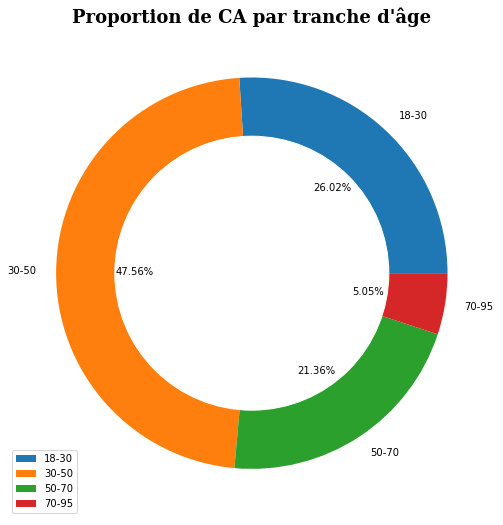

In [32]:
# Proportion de vente par tranche d'âge 
plt.figure(figsize=(9,9))
plt.pie(freqAchat_tranche['Nb_achat'],labels=["18-30","30-50","50-70","70-95"],normalize = True,autopct =lambda x: str(round(x, 2)) + '%' )
plt.title("Proportion de vente par tranche d'âge",fontdict={'family': 'serif', 'color' : 'black','weight': 'bold','size': 18})
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(loc='best')
      
print()
      
      
plt.figure(figsize=(9,9))
plt.pie(ca_age['ca'],labels=["18-30","30-50","50-70","70-95"],normalize = True,autopct =lambda x: str(round(x, 2)) + '%' )
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Proportion de CA par tranche d'âge",fontdict={'family': 'serif', 'color' : 'black','weight': 'bold','size': 18})
plt.legend(loc='lower left')

In [33]:
vente_age_categ = rapport.groupby(['intervalle_age', 'categ'])['session_id'].count()
print("Vente par catégorie et tranche d'âge :")
print(vente_age_categ)


Vente par catégorie et tranche d'âge :
intervalle_age  categ
[18, 30)        0         15938
                1         26610
                2         28361
[30, 50)        0        292302
                1         91549
                2          2948
[50, 70)        0         64883
                1         75637
                2          1241
[70, 95)        0         14370
                1         18552
                2           298
Name: session_id, dtype: int64


# Courbe de lorenz 


Courbe Lorenz : 
Gini :  0.4


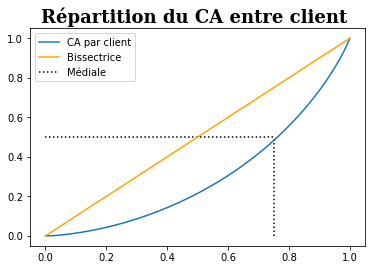

In [69]:
Lorenz_gini(rapport)

**Indice (ou coefficient) de gini :**
Plus l'écart entre la courbe de Lorenz et la première bissectrice est grand, plus le coefficient de Gini est grand.
0 = égalité parfaite, 1=inégalité extrême. 
Ici : 0.45. Nous sommes donc entre les deux, c a d 45% des clients rapportent 55% du CA 

# Concernant le type 

Type de clients
f    329215
m    303474
Name: sex, dtype: int64
Sur toutes les ventes, 303474 sont des hommes et 329215 sont des femmes


Nb de vente par genre et tranche d'âge
sex                  f       m
intervalle_age                
[18, 30)         36580   34329
[30, 50)        200177  186622
[50, 70)         73489   68272
[70, 95)         18969   14251


Nb de vente par catégorie
sex         f       m
categ                
0      200904  186589
1      111331  101017
2       16980   15868


Nb de vente par tranche d'âge et catégorie
intervalle_age  [18, 30)  [30, 50)  [50, 70)  [70, 95)
categ sex                                             
0     f             8306    151116     33390      8092
      m             7632    141186     31493      6278
1     f            13703     47446     39475     10707
      m            12907     44103     36162      7845
2     f            14571      1615       624       170
      m            13790      1333       617       128




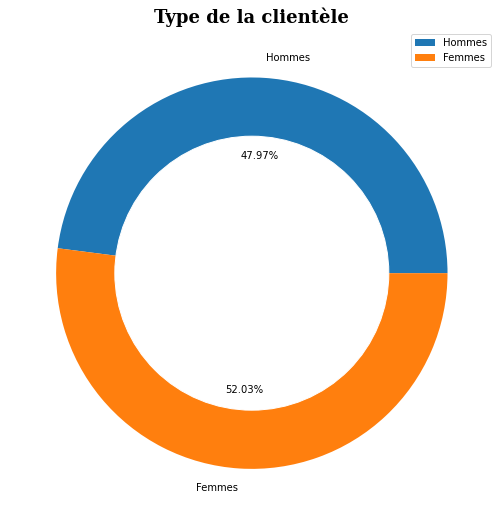

In [35]:
# Pie chart pour femme et homme comparaison type clientèle
print("Type de clients")
total_f_h = rapport['sex'].value_counts()
print(total_f_h)
print("Sur toutes les ventes, 303474 sont des hommes et 329215 sont des femmes")

print()
print()

print("Nb de vente par genre et tranche d'âge")
df_crosstab_type_age = pd.crosstab(rapport['intervalle_age'],
                                    rapport['sex'])
print(df_crosstab_type_age)

print()
print()

print("Nb de vente par catégorie")
df_crosstab_type_categ = pd.crosstab(rapport['categ'],
                                    rapport['sex'])
print(df_crosstab_type_categ)

print()
print()

print("Nb de vente par tranche d'âge et catégorie")
df_crosstab_type_categ_age = pd.crosstab([rapport.categ, rapport.sex],
                                    rapport['intervalle_age'])
print(df_crosstab_type_categ_age)

print()
print()

graph_nb_type = [303474,329215]
plt.figure(figsize=(9,9))
plt.pie(graph_nb_type, labels=["Hommes", "Femmes"], normalize = True,autopct =lambda x: str(round(x, 2)) + '%' )
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Type de la clientèle",fontdict={'family': 'serif', 'color' : 'black', 'weight': 'bold','size': 18})
plt.legend()

In [36]:
# Nb de ventes totales par Type client et categ
genre_vente = rapport.groupby(['sex', 'categ'], as_index=False)['session_id'].count()
print("Nombre de vente par type client et catégorie :")
print(genre_vente)

print()

# CA global par type client et categ
genre_prix = rapport.groupby(['sex', 'categ'], as_index=False)['price'].sum()
print('Nombre de CA par type client et âge :')
print(genre_prix)


Nombre de vente par type client et catégorie :
  sex  categ  session_id
0   f      0      200904
1   f      1      111331
2   f      2       16980
3   m      0      186589
4   m      1      101017
5   m      2       15868

Nombre de CA par type client et âge :
  sex  categ       price
0   f      0  2133939.52
1   f      1  2285170.48
2   f      2  1288155.25
3   m      0  1987516.85
4   m      1  2064262.51
5   m      2  1215909.21


Le CA global des femmes est de : 5707265.25
Le CA global des hommes est de : 5267688.57



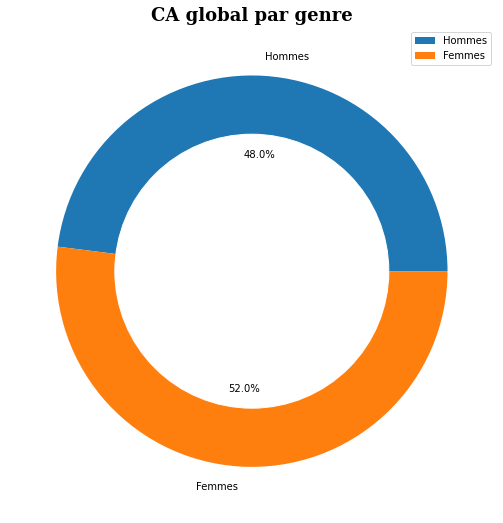

In [37]:
# On va faire deux df par genre pour si besoin mieux les manipuler par la suite

femmes_df = rapport.loc[rapport['sex'] == 'f']
total_CA_femmes = femmes_df.price.sum()
print("Le CA global des femmes est de :",round(total_CA_femmes,2))
hommes_df = rapport.loc[rapport['sex'] == 'm']
total_CA_hommes = hommes_df.price.sum()
print("Le CA global des hommes est de :",round(total_CA_hommes,2))


print()


graph=[5267688.57, 5707265.25 ]
plt.figure(figsize=(9,9))
plt.pie(graph, labels=["Hommes", "Femmes"], normalize = True,autopct =lambda x: str(round(x, 2)) + '%' )
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("CA global par genre",fontdict={'family': 'serif', 'color' : 'black', 'weight': 'bold','size': 18})
plt.legend()

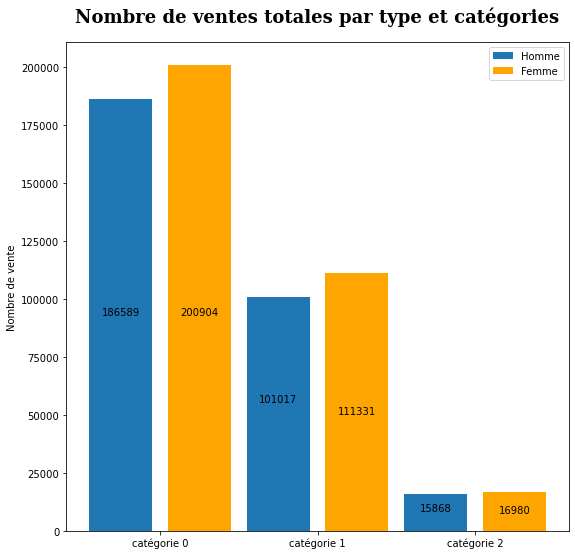

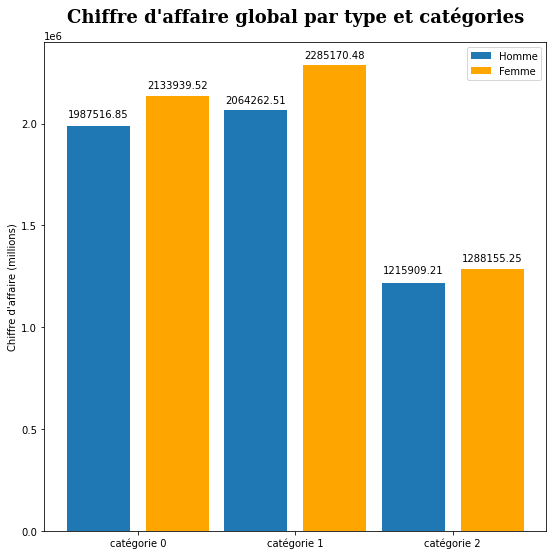

In [38]:
# graph nb de ventes totales par Type client et categ
y= [200904,111331,16980] # femmes
x = ["catégorie 0", 'catégorie 1', 'catégorie 2']
y1 = [186589, 101017,15868] # hommes
x_pos = [0.5,1.5 ,2.5] # Permet de décaler le bar de femme bien à côté de y 
plt.figure(figsize=(9,9))
plt.bar(x, y1, width=0.4 , label='Homme')
plt.bar(x_pos, y, color='orange', width=-0.4, label='Femme')
plt.title("Nombre de ventes totales par type et catégories", pad=(20),fontdict={'family': 'serif', 'color' : 'black','weight': 'bold','size': 18});
plt.ylabel('Nombre de vente')
plt.xticks([0.25, 1.25,2.25], ["catégorie 0", 'catégorie 1', 'catégorie 2']) # Décale les étiquettes categ où on veut
plt.legend()
#plt.annotate(y[0], (1,y[0]/2), ha="center")
plt.annotate(y1[0], ( 0,y1[0]/2),ha="center")
plt.annotate(y1[1], (1,y[1]/2), ha="center")
plt.annotate(y1[2], (2,y[2]/2), ha="center")
plt.annotate(y[0], ( 0.5,y1[0]/2),ha="center")
plt.annotate(y[1], ( 1.5,y1[1]/2),ha="center")
plt.annotate(y[2], ( 2.5,y1[2]/2),ha="center")
plt.show()





#Graph CA global par type client et categ
y= [2133939.52,2285170.48,1288155.25] # femmes
x = ["catégorie 0", 'catégorie 1', 'catégorie 2']
y1 = [1987516.85, 2064262.51,1215909.21] # hommes
x_pos = [0.5,1.5 ,2.5] # Permet de décaler le bar de femme bien à côté de y 
plt.figure(figsize=(9,9))
plt.bar(x, y1, width=0.4 , label='Homme')
plt.bar(x_pos, y, color='orange', width=-0.4, label='Femme')
plt.title("Chiffre d'affaire global par type et catégories", pad=(20),fontdict={'family': 'serif', 'color' : 'black','weight': 'bold','size': 18});
plt.ylabel("Chiffre d'affaire (millions)")
plt.xticks([0.25, 1.25,2.25], ["catégorie 0", 'catégorie 1', 'catégorie 2']) # Décale les étiquettes categ où on veut
plt.legend()
#plt.annotate(y[0], (1,y[0]/2), ha="center")
plt.annotate(y1[0], ( 0,y1[0]/0.98),ha="center")
plt.annotate(y1[1], (1,y[1]/1.09), ha="center")
plt.annotate(y1[2], (2,y[2]/1.02), ha="center")

plt.annotate(y[0], ( 0.5,y1[0]/0.915),ha="center")
plt.annotate(y[1], ( 1.5,y1[1]/0.89),ha="center")
plt.annotate(y[2], ( 2.5,y1[2]/0.92),ha="center")
plt.show()

In [39]:
# Panier moyen selon type client : 
pan = rapport.groupby('sex')['price'].mean()
print('Panier moyen par genre :')
print(round(pan,2))

print()

#Panier moyen selon type client et par categ :
pan_cat_h_f = rapport.groupby(['sex', 'categ'])['price'].mean()
print("Panier moyen par genre et categ")
print(round(pan_cat_h_f,2))

Panier moyen par genre :
sex
f    17.34
m    17.36
Name: price, dtype: float64

Panier moyen par genre et categ
sex  categ
f    0        10.62
     1        20.53
     2        75.86
m    0        10.65
     1        20.43
     2        76.63
Name: price, dtype: float64


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">2 - Corrélations </h2>
</div>

Préambule :

**Une corrélation** est une mesure statistique qui décrit la relation (lien) entre deux variables

**Une causalité** affirme qu'une variable agit sur une autre. Il est important de préciser qu'on n'affirmera pas ici qu'il y a une causalité. Simplement une corrélation.
    
**Test para** : Les tests paramétriques sont des tests dont l'échantillon que nous étudions suit une certaine loi (loi normale par exemple (**Test de normalité**) ou vérifie un certain nombre d'hypothèses. Ils sont plus puissants mais nécessitent un certain nombres d'hypothèses à vérifier.

**Test non para** : plus robuste, alternative aux tests para. Ils sont utiles lorsque l'hypothèse de normalité ne tient pas et que l'effectif d'échantillon est faible. 
    
**Seuil de signification "alpha"** sera tjrs de 0.05 car on ne nous a pas précisé le niveau de confiance souhaité : par défaut ça sera 95% . Alpha étant la probabilité ou le risque (5% doit être < ou = à 0.05) de rejeter à tord l'H0.
Si le le résultat est significatif : génère une p value < ou = au niveau de signification, un résultat est alors défini comme statistiquement significatif et ne sera donc pas considéré comme un événement fortuit. 

**P value** est la probabilité d'observer un résultat : permet de confirmer ou d'infirmer notre hypthèse selon alpha (seuil de signification)) Si pvalue < alpha = rejet H0, si p value > 0.05, H0 non rejetée.

**test de normalité** : Lorsque la taille des échantillons est suffisamment grande (n >30), on peut ignorer le test de normalité sans problème majeur. Le théorème central limite nous dit que, la distribution de l’échantillonnage tend à suivre la loi normale lorsque la taille est grande ( n > 30). Mais on va quand même faire des tests de significativité :
Le test de significativité compare la distribution d’un échantillon donné à celle de la loi normale et renvoie une p-value. Il y en a plein et chacun est différent : Chaque test calcule une statistique spécifique au test. 
ex : test de Kolmogorov-Smirnov "K-S" (variable continue) et le test de Shapiro-Wilk. (petit échantillon : jusqu'à 50 valeurs), normaltest (test de D'Agostino et Pearson qui combine skew et kurtosis)

**loi normale** : Courbe "gaussienne" en cloche, symétrique, données situent autour de la moy sans biais à G ni à Dte, Z scores 65% des D -1+1, 95% -2+2 et 99%-3+3

**Méthodologie** :

- Quelles sont le type de mes variables ? 
- Je choisie un test
- Quelles sont les conditions pour que ce test soit applicable ? 
- Visuel 
- Optionnel : Si je n'ai pas les conditions réunies, quelles sont mes alternatives ? (non para ?)
- Test et résultat

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">4.1- Type client par catégorie </h3>
</div>

Type et categ sont deux variables qualitatives : **Test de Khi-2** indique si les fréquences d’observation d’une catégorie dépendent des modalités de l’autre catégorie (corrélation) 

**Conditions test de khi-2**

Comporte deux groupes (ou deux mesures) et vars qualitatives : va comparer les fréquences de ces deux groupes afin d'inférer une relation entre X et Y. 
Le khi-2 est un test para, assume que les échantillons suivent une loi normale.

**Alternative** : test exact de fisher (non para)

In [40]:
# TABLEAU DE CONTINGENCE :
#On avait déjà rélisé un groupby genre/categ mais j'ai voulu essayé avec crosstab
#(Note à moi-même : margins=True, margins_name="total")
contigency=  pd.crosstab(index=rapport["sex"], columns=rapport["categ"] )
contigency

categ,0,1,2
sex,,,
f,200904,111331,16980
m,186589,101017,15868


In [41]:
# fréquence en %
contigency_pct = pd.crosstab(rapport['sex'], rapport['categ'], normalize='index')
contigency_pct

categ,0,1,2
sex,,,
f,0.610252,0.338171,0.051577
m,0.614843,0.332869,0.052288


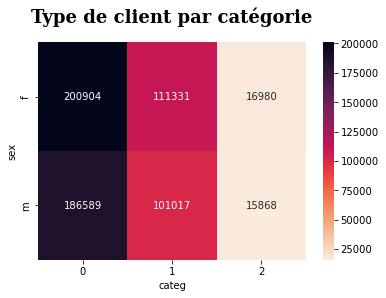

In [42]:
# Visuel heatmap
sns.heatmap(contigency, cmap='rocket_r', annot=True, fmt='g');
plt.title("Type de client par catégorie", pad=(20),fontdict={'family': 'serif', 'color' : 'black','weight': 'bold','size': 18});


On constate qu'il y a un très léger écart entre homme et femme par catégorie.

- Categ 0 = 0.004591 de différence soit 0.4%
- Categ 1 = 0.005302 de différence soit 0.5%
- Categ 2 = 0.0007106 de différence soit 0.07%



### **Test de normalité** :

**H0** : nos échantillons suivent une loi normale

**H1** : nos échantillons ne suivent pas une loi normale


Test de Shapiro :  'statistic' = basé sur la corrélation, + il est proche de 1, mieux il montre que les données correspondent à la distribution normale et 'pvalue'.

In [43]:
# Test de Shapiro-Wilk : car échantillon de petite taille
from scipy.stats import shapiro
alpha=0.05 
resultat = shapiro(contigency)
print("statistic", round(resultat[0],3))
print("p-value", resultat[1])
if resultat[1] < alpha:
    print('H0 rejetée')
else:
    print("H0 non rejetée")

statistic 0.888
p-value 0.3066459894180298
H0 non rejetée


pvalue > alpha = **H0 non rejetée = nos échantillons suivent une loi normale**

On va voir avec le khi-2 s'il semble vraiment y avoir un lien :  

### Hypothèses :

**H0** = Categ et le genre d'un client sont indépendants (pas de lien)


**H1** = Le genre d'un client va influencer l'achat d'une des catégories de pdt (lien)

stat de test (vraisemblance) 20.2
p-value 0.0
degré de liberté 2
H0 rejetée


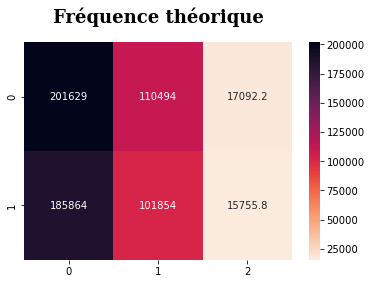

In [44]:
# Chi-square test of independence
from scipy.stats import chi2_contingency
alpha = 0.05 

chi2, p, dl, contingent_theorique = chi2_contingency(contigency) 
# chie2=coef de corrélation, dof=degré de liberté, pvalue

#Dans les statistiques, les degrés de liberté sont utilisés pour définir le nombre de grandeurs indépendantes pouvant être affectées à une distribution statistique
#

print("stat de test (vraisemblance)", round(chi2,3))
print("p-value", round(p,3))
print("degré de liberté", round(dl,3))
#print("Valeurs théoriques :", contingent_theorique)
if p < alpha:
    print('H0 rejetée')
else:
    print("H0 non rejetée")
    
sns.heatmap(contingent_theorique, cmap='rocket_r', annot=True, fmt='g');
plt.title('Fréquence théorique', pad=(20),fontdict={'family': 'serif', 'color' : 'black','weight': 'bold','size': 18});

Pvalue < alpha = **H0 rejetée : Il semble y avoir un lien significatif** entre le genre d'un client et les catégories de pdts.

Les fréquences théoriques sont relativement proche des fréquences obtenues dans le tableau de contingence.

v cramer permet de mesurer la force de l'association entre deux variables nominales .
0=aucune association, 1=très forte association

In [45]:
# V-Cramer = On connait le coeff de corrélation (20,20% = chi2) mais on ne sait pas sur quelle catégorie le lien est lep plus fort ? 
X2 = 20.200
n = np.sum(contigency)
minDim = min(contigency.shape)-1

#calculate Cramer's V 
V = np.sqrt((X2/n) / minDim)

#display Cramer's V
print(round(V,3))


categ
0    0.007
1    0.010
2    0.025
dtype: float64


On note des associations très faibles, notamment 0.025 pour l'association la plus forte :la categ 2

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">4.2- Montant (CA) et type </h3>
</div>

Variable quantitative et qualitative : **test de student** = va comparer les moyennes des deux echantillons (t-test) et estimer la probabilité que la différence entre ces deux échantillons soit due au hasard (la p-value).
Plus la p-value est petite, plus l'intervention du hasard est peu probable et la différence certaine




Conditions :
Si les deux groupes d’échantillons (x et y), à comparer, suivent une loi normale;
et si les variances des deux groupes égales. (alternative paramètre equal_var=False) 


Test alternatif : Man-Withney








RESULTAT TEST DE NORMALITE NormaltestResult(statistic=324306.357612918, pvalue=0.0)


Text(150, 25000, 'Normalité (p-val) : 0.0')

<Figure size 576x576 with 0 Axes>

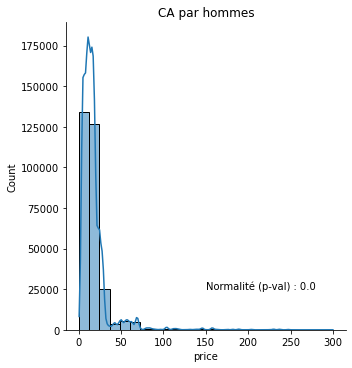

In [46]:
# D'abord un visuel pour les hommes: 

df_h = rapport.loc[rapport['sex']== 'm']
x = df_h['price']

df_f = rapport.loc[rapport['sex']== 'f']
y = df_f['price']

plt.figure(figsize=(8,8))
h = sns.displot(x, bins=25, kde=True)
plt.title('CA par hommes')

# TEST DE LA NORMALITE
t = scipy.stats.normaltest(x)
print("RESULTAT TEST DE NORMALITE", t)
plt.text(150,25000,"Normalité (p-val) : " + str(t.pvalue))

RESULTAT TEST DE NORMALITE NormaltestResult(statistic=350987.978824266, pvalue=0.0)


Text(150, 25000, 'Normalité (p-val) : 0.0')

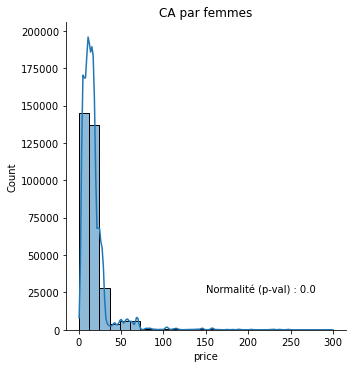

In [47]:
# Puis pour les femmes
f = sns.displot(y, bins=25, kde=True)
plt.title('CA par femmes')

# TEST DE LA NORMALITE
t = scipy.stats.normaltest(y)
print("RESULTAT TEST DE NORMALITE", t)
plt.text(150,25000,"Normalité (p-val) : " + str(t.pvalue))

**Test de normalité** :

On a utilisé scipy.stats.normaltest()  : fct basé sur le test de D'Agostino et Pearson qui combine skew et kurtosis :

**H0** : echantillon suit une loi normale

**H1** : ne suit pas une loi normale

alpha=0.05

Nos deux pvalues sont à 0.00 soit < alpha, on peut rejeter H0 : nos échantillons ne suivent pas une loi normale.



On va regarder **l'égalité des variances** : On va prendre un test non para (Fligner)

**H0** : Variance x = variance y

**H1** : Variance x =! de variance y

In [48]:
# On va tester l'égalité de nos variances :
from scipy.stats import fligner
alpha=0.05

resultat = fligner(x, y, center='median')
print("stat de test", round(resultat[0],3))
print("p-value", resultat[1])
if resultat[1] < alpha:
    print('H0 rejetée')
else:
    print("H0 non rejetée")

stat de test 1.056
p-value 0.3040176229216234
H0 non rejetée


P value > alpha = non rejet de l'hypothèse H0 : Nos deux échantillons semblent avoir des variances égales.

Nous avons donc une égalité des variances mais des échantillons qui ne suivent pas une loi normale : au vue du nombre de données que nous avons, nos données ne sont pas obligées de suivre une loi normale, nous pouvons continuer avec le t test 

**Hypothèses pour le t test** :

Etre un homme ou une femme influence-t'il le CA (ou montant des achats) ? 

**H0** = Le type d'un client ne va pas influencer le CA


**H1** = Le type d'un client va influencer le CA

In [49]:
# test student (t test) - compare les moyennes
from scipy.stats import ttest_ind
alpha = 0.05

stat, p = ttest_ind(x, y , equal_var=True) #car variance ==

print(f'stat=%.3f,  p=%.3f, ' % (stat, p))
if p < alpha:
    print('H0 rejetée')
else:
    print('H0 non rejetée')

stat=0.483,  p=0.629, 
H0 non rejetée


p-value > alpha 0.05 = non rejet de l'hypothèse nulle donc pas de corrélation significative entre les deux, on peut maintenir que le type d'un client ne va a priori pas influencer sur le CA.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">4.3- Age et montant </h3>
</div>

Variable quantitative (volonté de choisir age au lieu de var qualitative intervalle_age) pour avoir 2 quantitatives : 

**Coeff de Pearson** :(para) exprime l'intensité et le sens (positif ou négatif) de la relation linéaire entre deux variables quantitatives . Il assume des valeurs se situant dans l'intervalle qui va de - 1 (nég) à +1 (,0 = pas de corr. Plus ce coefficient est proche de -1 ou +1, plus l'association entre les deux variables est forte, jusqu'à être parfaite.)

Conditions : l'existence d'une variance non-nulle sur chacune des deux variables, sous peine de division par zéro, et échantillon doit suivre une loi normale

Alternative : Coeff de Spearman (non para)

Text(0, 0.5, 'Montant CA (euros)')

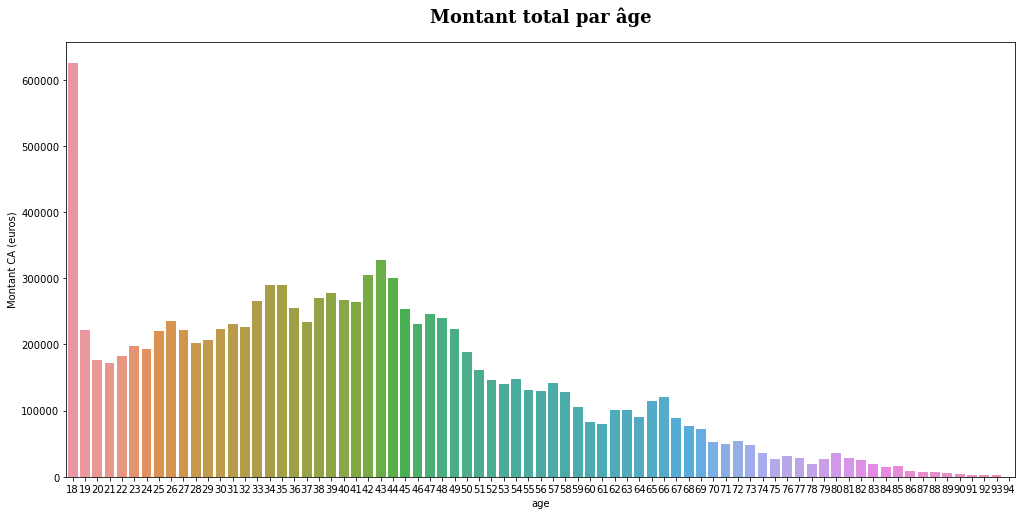

In [50]:
# Visuel : 
ages_montant = rapport.groupby('age', as_index=False)['price'].sum()

# Graph 
X = ages_montant.age
Y = ages_montant.price
plt.figure(figsize=(17,8))
sns.barplot(x=X,y=Y, data=ages_montant)
plt.title("Montant total par âge", pad=(20),fontdict={'family': 'serif', 'color' : 'black','weight': 'bold','size': 18});
plt.ylabel('Montant CA (euros)')

On constate un outlier (18 ans = tp de personnes agées de 18 ans ???? on se souvient avoir mis ceux de 17 ans dans la case des 18) comme c'est le seul outlier il ne va pas perturber le résultat du test. On ne le touche pas.


On s'aperçoit également de deux tendances : de 18 à 43 ans environ, les clients achètent de plus en plus, mais le phénmène s'inverse de 43 à 94 ans. On va donc découper notre échantillon en deux pour les analyser séparemment.

In [51]:
ages_montant1 = ages_montant.loc[ages_montant['age'] < 44]
ages_montant1.tail()

,age,price
21,39,277055.87
22,40,267827.70
23,41,264307.03
24,42,304340.51
25,43,327571.29


In [52]:
ages_montant2 = ages_montant.loc[ages_montant['age'] > 43]
ages_montant2.head()

,age,price
26,44,300448.91
27,45,253474.32
28,46,230773.51
29,47,246362.52
30,48,240618.96


**Test de normalité** : Smirnov-Kolmogorov

**H0** : échantillon suit une loi normale

**H1** : échantillon ne suit pas une loi normale

In [53]:
# Test de KS :
alpha = 0.05
resultat = scipy.stats.kstest(ages_montant1.price, ages_montant2.price, 'norm')
print("stat de test", resultat[0])
print("p-value", resultat[1])
if resultat[1] < alpha:
    print('H0 rejetée')
else:
    print("H0 non rejetée")

stat de test 0.8627450980392157
p-value 1.2179146580137967e-13
H0 rejetée


A priori, on peut rejeter l'hypothèse nulle car pvalue < alpha : nos données ne suivent pas une loi normale. On va pouvori néanmoins utiliser le test de corrélation de Pearson du fait de notre grands nombres d'observations.

Hypothèses :

**H0** : Il n'y a pas de lien entre l'âge des clients et les montants dépensés

**H1** : L'âge des clients semblent être influant sur les montants dépensés

In [54]:
resultat = scipy.stats.pearsonr(ages_montant1.age, ages_montant1.price)
print("stat de test", round(resultat[0],3))
print("p-value", resultat[1])
if resultat[1] < alpha:
    print('H0 rejetée')
else:
    print("H0 non rejetée")

stat de test 0.093
p-value 0.6523253053407325
H0 non rejetée


In [55]:
resultat = scipy.stats.pearsonr(ages_montant2.age,ages_montant2.price)
print("stat de test", round(resultat[0],3))
print("p-value", resultat[1])
if resultat[1] < alpha:
    print('H0 rejetée')
else:
    print("H0 non rejetée")

stat de test -0.935
p-value 1.009317815679102e-23
H0 rejetée


Pour le 1er groupe 18-43 ans : La stat du test est proche de 0, montre très peu de corrélation. Et pvalue > alpha : on ne peut pas rejeter H0 donc il n'y a pas de lien significatif entre l'âge des clients et les montants dépensés.

Pour le 2ème groupe 44-94 ans : on voit une corrélation linéaire négative (proche de -1) et une pvalue < alpha, on peut rejeter l'H0 : il semble y avoir un lien significatif entre l'âge des clients et les montants dépensés. Plus ils avancent dans l'âge, moins ils vont dépenser (x augmente mais y diminue)


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">4.4- Age et catégorie </h3>
</div>

Deux variables qualitatives + une quanti : **test d'ANOVA** : L’analyse de la variance (ANOVA) peut déterminer si les moyennes de trois groupes ou plus sont différentes. ANOVA utilise des tests F pour tester statistiquement l’égalité des moyennes

**Conditions** : test F valide si échantillons indépendants, suivent une loi normale et s'ils sont homoscédastique (variance ==)

**Alternative** : test de Kruskal-Wallis (test non para) Va determiner si les différents échantillons sont issus de la mm population.

In [56]:
crosstab = pd.crosstab(index=rapport['intervalle_age'], columns=rapport['categ'], values=rapport['date'], aggfunc='count')
crosstab

categ,0,1,2
intervalle_age,,,
"[18, 30)",15938,26610,28361
"[30, 50)",292302,91549,2948
"[50, 70)",64883,75637,1241
"[70, 95)",14370,18552,298


In [57]:
crosstab_pct = pd.crosstab(index=rapport['intervalle_age'], columns=rapport['categ'], values=rapport['date'], aggfunc='count', normalize='all')
crosstab_pct

categ,0,1,2
intervalle_age,,,
"[18, 30)",0.025191,0.042059,0.044826
"[30, 50)",0.461999,0.144698,0.004659
"[50, 70)",0.102551,0.119548,0.001961
"[70, 95)",0.022713,0.029322,0.000471


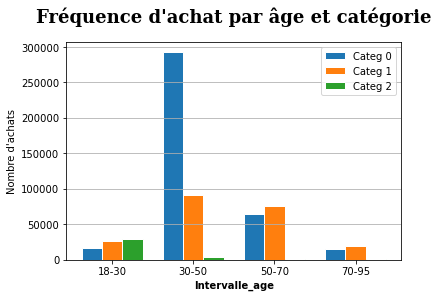

In [58]:
bars0 = [15938, 292302, 64883, 14370]
bars1 = [26610, 91549, 75637, 18552]
bars2 = [28361, 2948, 1241, 298]

# set width of bars
barWidth = 0.25
#Position of bar x
r0 = np.arange(len(bars0))
r1 = [x + barWidth for x in r0]
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r0, bars0,  width=barWidth, edgecolor='white', label='Categ 0')
plt.bar(r1, bars1,  width=barWidth, edgecolor='white', label='Categ 1')
plt.bar(r2, bars2,  width=barWidth, edgecolor='white', label='Categ 2')

plt.title("Fréquence d'achat par âge et catégorie", pad=(20),fontdict={'family': 'serif', 'color' : 'black','weight': 'bold','size': 18});
plt.grid(axis='y') 

# Add xticks on the middle of the group bars
plt.xlabel('Intervalle_age', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['18-30', '30-50', '50-70', '70-95'])
plt.ylabel("Nombre d'achats")

# Create legend & Show graphic
plt.legend()
plt.show()

**test de normalité** : Shapiro wilk : 

**H0** : Nos échantillons suivent une loi normale

**H1** : Nos échantillons ne suivent pas une loi normale

In [59]:
# test de normalité KS :
from scipy.stats import shapiro
alpha=0.05
resultat = shapiro(crosstab.values)
print("statistic", round(resultat[0],3))
print("p-value", resultat[1])
if resultat[1] < alpha:
    print('H0 rejetée')
else:
    print("H0 non rejetée")

statistic 0.644
p-value 0.00025444349739700556
H0 rejetée


Nos échantillons ne suivent pas une loi normale. On va regarder l'égalité des variances : 

**Test d'égalité des variances** :  homogénéité de la variance = homoscédasticité

**H0** : La variance des groupes sont égales 

**H1** : La variance des groupes sont différentes

In [60]:
# Echantillons :
a = [15938, 26610, 28361] #18_30
b = [292302, 91549, 2948] #30_50
c = [64883, 75637, 1241] #50_70 
d = [14370, 18552, 298] #70_95 


# Test de levene : 
alpha = 0.05

resultat = st.levene(a,b,c,d, center = 'median')
print("stat de test", round(resultat[0],3))
print("p-value", resultat[1])
if resultat[1] < alpha:
    print('H0 rejetée')
else:
    print("H0 non rejetée")

stat de test 1.988
p-value 0.19437832073007952
H0 non rejetée


Pvalue > alpha, non rejet de l'H0 donc les variances des groupes sembles être ==

Les conditions de l'ANOVA ne sont donc pas remplies au niveau de la loi normale et nos échantillons sont de petites tailles: on va faire le test alternatif Kruskal-Wallis

**Test alternatif Kruskal-Wallis**
Hypothèses :

**H0** : L'age et les catégories ne sont pas correlés

**H1** : L'age et les catégories sont correlés

In [61]:
# Test de Kruskal-Wallis
alpha = 0.05

resultat = st.kruskal(a,b,c,d)
print("stat de test", round(resultat[0],3))
print("p-value", resultat[1])
if resultat[1] < alpha:
    print('H0 rejetée')
else:
    print("H0 non rejetée")

stat de test 3.0
p-value 0.3916251762710877
H0 non rejetée


Il semble ne pas y avoir de lien significatif entre les catégories et l'âge

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">4.5- Panier moyen et fréquence </h3>
</div>

2 var quanti : **Coeff de Pearson**

**conditions** : données doivent suivre une loi normale

**test alternatif** : Spearman

In [62]:
#Panier moyen par client
x = round(rapport.groupby('client_id',as_index=False)['price'].mean(),2)
x.columns = ['client_id', 'panier_moyen']

# Fréquence d'achat par client 
y = rapport.groupby('client_id', as_index=False)['price'].count()
y.columns = ['client_id', 'frequence_achat']

# Merge :
xy = pd.merge(left=x, 
             right=y, how='inner', on='client_id')
xy

,client_id,panier_moyen,frequence_achat
0,c_1,14.31,39
1,c_10,23.34,58
2,c_100,31.86,8
3,c_1000,18.10,125
4,c_1001,17.77,102
...,...,...,...
8591,c_995,13.53,14
8592,c_996,17.11,95
8593,c_997,25.25,59
8594,c_998,52.45,53


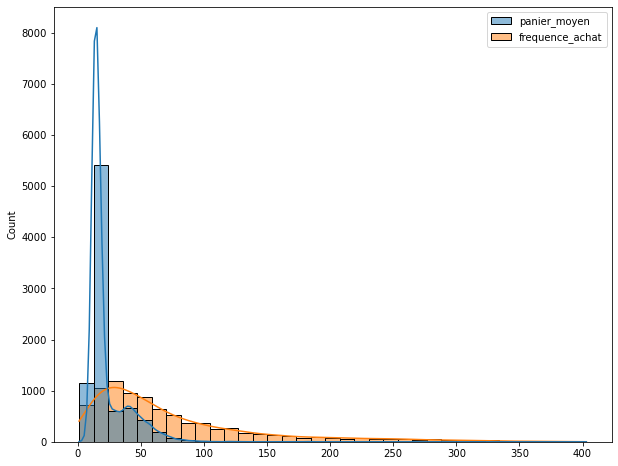

In [63]:
#Visuel panier / freq achat par client:
plt.figure(figsize=(10,8))
h = sns.histplot(xy, kde=True, bins=35)

### Test de normalité : KS 

**H0** : Nos deux variables suivent une loi normale

**H1** : Nos deux variables ne suivent pas une loi normale

In [64]:
#Test de normalité KS : 
alpha = 0.05
resultat = st.kstest(x.panier_moyen, y.frequence_achat, 'norm')
print("stat de test", round(resultat[0],3))
print("p-value", resultat[1])
if resultat[1] < alpha:
    print('H0 rejetée')
else:
    print("H0 non rejetée")

stat de test 0.566
p-value 0.0
H0 rejetée


P value à 0 < alpha donc rejet de l'H0 : nos deux variables ne suivent à priori pas une loi normale. Au vue du nombre de données que l'on a, on va pouvoir tout de même effectuer le test paramétrique de Pearson : 

Hypothèses :

**H0** : Il n'y a pas de lien entre le panier moyen et la fréquence d'achat des clients

**H1** : Il y a un lien entre le panier moyen et la fréquence d'achat des clients

In [65]:
#test de Pearson :
resultat = scipy.stats.pearsonr(x.panier_moyen, y.frequence_achat)
print("stat de test", round(resultat[0],3))
print("p-value", resultat[1])
if resultat[1] < alpha:
    print('H0 rejetée')
else:
    print("H0 non rejetée")

stat de test -0.338
p-value 1.600580000891157e-228
H0 rejetée


Coeff de -0.34 = légère corrélation linéaire négative, pvalue < alpha nous pouvons donc rejeter l'hypothèse nulle. D'après le test, il y a un lien significatif entre le panier moyen et la fréquence des clients. Il semblerait que plus le panier moyen des clients augmente (x), plus la fréquence d'achat des clients diminue (y) --> (corr linéaire négative)